1. 导入库与数据集

In [2]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('./data/Social_Network_Ads.csv')
X = dataset.iloc[:, [2,3]].values
Y = dataset.iloc[:, 4].values
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


2. 将数据集分割成训练集和测试集

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

3. 特征缩放

In [4]:
from sklearn.preprocessing import StandardScaler
## 创建一个用于特征缩放的实例
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

注意，这里是对X的训练集先使用fit方法计算均值与方差，再通过transform方法进行标准化，将数据集映射到[0,1]。
同时，对于X的测试集而言，无需再使用fit方法，这里用训练集的参数来对测试集进行标准化，这样可以避免数据泄露。

4. 使用逻辑回归模型

In [9]:
from sklearn.linear_model import LogisticRegression
## 创建一个逻辑回归分类LogisticRegression对象
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [10]:
## 对x测试集预测测试结果
y_pred = classifier.predict(X_test)

5. 评估预测效果

In [11]:
## 生成混淆矩阵(包含我们模型的正确和错误的预测)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

C:\Users\11312\AppData\Local\Temp\ipykernel_22412\1480146674.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],


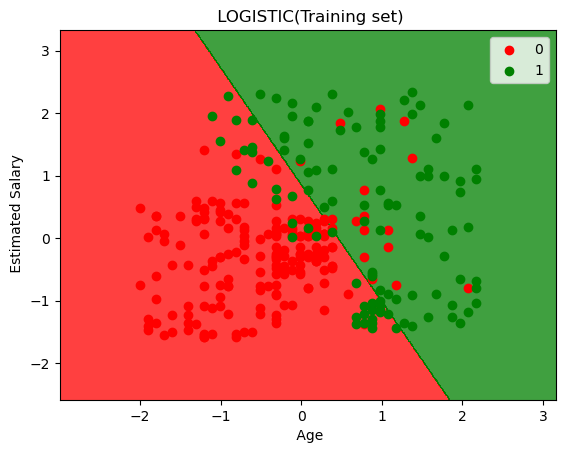

C:\Users\11312\AppData\Local\Temp\ipykernel_22412\1480146674.py:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],


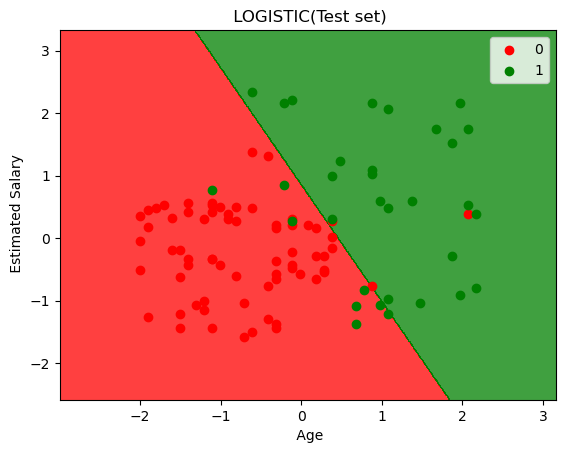

In [ ]:
## 可视化
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
X_set,y_set=X_train,y_train
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                   np.arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np. unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
                c = ListedColormap(('red', 'green'))(i), label=j)

plt.title(' LOGISTIC(Training set)')
plt.xlabel(' Age')
plt.ylabel(' Estimated Salary')
plt.legend()
plt.show()

X_set,y_set=X_test,y_test
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                   np.arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np. unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
                c = ListedColormap(('red', 'green'))(i), label=j)

plt.title(' LOGISTIC(Test set)')
plt.xlabel(' Age')
plt.ylabel(' Estimated Salary')
plt.legend()
plt.show()